# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [403]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 1. Read in the file using pandas, and look at the first five rows

In [404]:
df = pd.read_excel('KyotoFullFlower7.xls')
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by following studies.,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, e.g. 402 --> April 2).",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [405]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25) #find out if there should be spaces around the equal sign
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [406]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [407]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25, na_values='-')

In [408]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. What source is the most common as a reference?

In [409]:
df['Reference Name'].value_counts().nlargest(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [410]:
df = df[df['Full-flowering date (DOY)'].isna() == False]

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

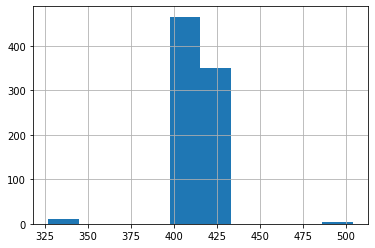

In [411]:
df['Full-flowering date'].hist() 

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

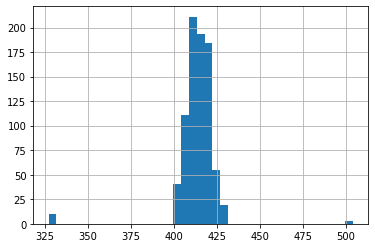

In [412]:
df['Full-flowering date'].hist(bins = 39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [439]:
df['Full-flowering date (DOY)'].describe()#am i using the right column?

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [416]:
df[df.AD < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [417]:
df[df.AD > 1900]['Full-flowering date (DOY)'].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [418]:
df[df['Data type code'] == 4].shape[0] #is shape the better-style alternative to len?

39

## 13. Show only the years where our data was from a title in Japanese poetry

In [442]:
df[df['Data type code'] == 4]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,date,month,day_of_month
90,891,109.0,0419,5.0,4.0,NIHONKIRYAKU,101.900000,04-19,April,19
94,895,104.0,0414,5.0,4.0,NIHONKIRYAKU,102.846154,04-14,April,14
95,896,104.0,0413,5.0,4.0,NIPPON-SANDAI-JITSUROKU,102.928571,04-13,April,13
122,923,104.0,0414,5.0,4.0,ZOKU-KOKIN-WAKASHU,102.250000,04-14,April,14
154,955,89.0,0330,5.0,4.0,SHUISHO,101.750000,03-30,March,30
168,969,98.0,0408,5.0,4.0,NIHONKIRYAKU,100.650000,04-08,April,8
206,1007,106.0,0416,5.0,4.0,MIDO-KAMPAKUKI,102.000000,04-16,April,16
232,1033,102.0,0412,5.0,4.0,NIHONKIRYAKU,105.650000,04-12,April,12
235,1036,104.0,0413,5.0,4.0,NIHONKIRYAKU,105.200000,04-13,April,13
259,1060,108.0,0417,5.0,4.0,SHIN-SENZAI-WAKASHU,106.050000,04-17,April,17


## 14. Graph the full-flowering date (DOY) over time

array([[<AxesSubplot:title={'center':'Full-flowering date (DOY)'}>]],
      dtype=object)

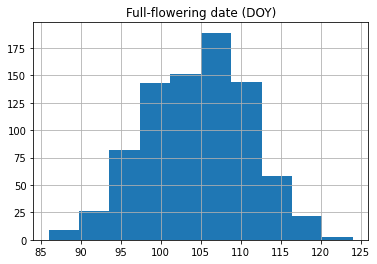

In [420]:
df.hist(['Full-flowering date (DOY)'])

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [421]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [422]:
df['rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

<AxesSubplot:xlabel='AD'>

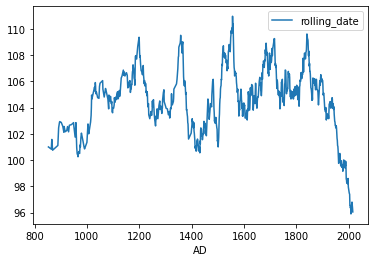

In [448]:
df.plot('AD', 'rolling_date')

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [424]:
df['Full-flowering date'] = df['Full-flowering date'].astype(int).astype(str).str.zfill(4)

In [427]:
df['date'] = pd.to_datetime(df['Full-flowering date'], format='%m%d', errors='coerce')

In [428]:
df['month'] = df['date'].dt.month_name()

In [429]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,date,month
11,812,92.0,0401,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,April
14,815,105.0,0415,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,April
30,831,96.0,0406,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,April
50,851,108.0,0418,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,April
52,853,104.0,0414,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,1900-04-14,April


### 17. Using your new column, how many blossomings happened in each month?

In [430]:
df['month'].value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot:>

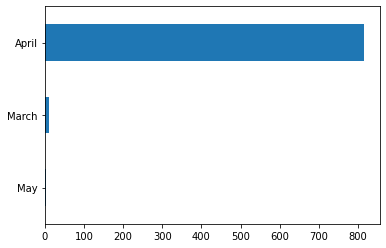

In [431]:
df['month'].value_counts().sort_values().plot(kind='barh')

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [432]:
df['day_of_month'] = df['date'].dt.day

In [433]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,date,month,day_of_month
11,812,92.0,0401,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,April,1
14,815,105.0,0415,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,April,15
30,831,96.0,0406,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,April,6
50,851,108.0,0418,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,April,18
52,853,104.0,0414,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,1900-04-14,April,14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,0409,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,1900-04-09,April,9
1211,2012,101.0,0410,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,1900-04-10,April,10
1212,2013,93.0,0403,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,1900-04-03,April,3
1213,2014,94.0,0404,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,1900-04-04,April,4


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

In [437]:
df['date'] = df['date'].dt.strftime('%m-%d')

In [438]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,rolling_date,date,month,day_of_month
11,812,92.0,0401,1.0,2.0,NIHON-KOKI,NaN,04-01,April,1
14,815,105.0,0415,1.0,2.0,NIHON-KOKI,NaN,04-15,April,15
30,831,96.0,0406,1.0,2.0,NIHON-KOKI,NaN,04-06,April,6
50,851,108.0,0418,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,04-18,April,18
52,853,104.0,0414,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,04-14,April,14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,0409,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,04-09,April,9
1211,2012,101.0,0410,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,04-10,April,10
1212,2013,93.0,0403,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,04-03,April,3
1213,2014,94.0,0404,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,04-04,April,4


# YOU ARE DONE.

And **incredible.**